In [1]:
import numpy as np
import sklearn
import h5py as h5
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from Bio import SeqIO

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# change the OUTPUT_PATH to where one wants to save output
OUTPUT_PATH = r'your_path_here'

def get_labels(fasta_file):
    
    seq_rec = list(SeqIO.parse(fasta_file, "fasta"))
    labels=[]
    samples=[]
    for i,r in enumerate(seq_rec):
        if r.name == r.description:
            labels.append(r.name)
        else:
            labels.append(r.description.split(' ')[1])
        samples.append(r.seq)
    return labels, samples   

In [3]:
#github path to data: https://github.com/IcarPA-TBlab/nrc/tree/master/data/ECCB2017

fastaTrain='dataset_Rfam_6320_13classes.fasta'
fastaTest='dataset_Rfam_validated_2600_13classes.fasta'

ltrain, seqTrain = get_labels(fastaTrain)
ltest, seqTest = get_labels(fastaTest)

In [4]:
index = []
dct = {}
for i, seq in enumerate(seqTrain):
    if str(seq) not in dct:
        dct[str(seq)] = i
    else:
        index.append(i)

In [5]:
print(index)

[]


In [6]:
index = []
for i, seq in enumerate(seqTest):
    if str(seq) in dct:
        index.append(i)

In [7]:
print(len(index))

347


** we remove duplicates from test set **

In [8]:
ltest = [x for i, x in enumerate(ltest) if i not in index]
seqTest = [x for i, x in enumerate(seqTest) if i not in index]

In [9]:
labels = ltrain + ltest
seqs = seqTrain + seqTest

In [10]:
pd.Series(labels).value_counts()

tRNA           700
5S_rRNA        697
miRNA          696
CD-box         695
HACA-box       694
riboswitch     693
ribozyme       688
5_8S_rRNA      684
Intron_gpI     674
Intron_gpII    660
leader         645
scaRNA         603
IRES           444
dtype: int64

In [11]:
le = LabelEncoder()
le.fit(labels)

LabelEncoder()

<AxesSubplot:>

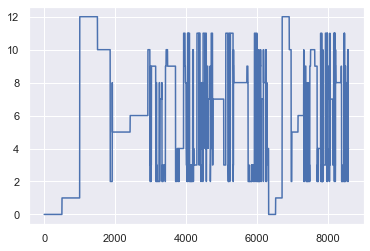

In [12]:
# some pattern here -> need to shuffle
pd.Series(le.transform(labels)).plot()

In [13]:
labels, seqs = sklearn.utils.shuffle(labels, seqs, random_state=777)

<AxesSubplot:>

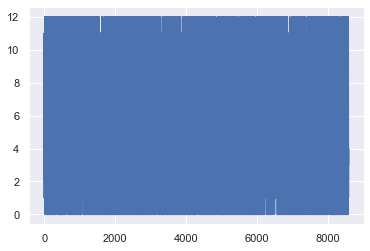

In [14]:
# fixed now
pd.Series(le.transform(labels)).plot()

In [15]:
y_train, y_test, X_train, X_test = train_test_split(labels, seqs, test_size=0.2, stratify=labels)

In [17]:
y_val, y_test, X_val, X_test = train_test_split(y_test, X_test, test_size=0.5, stratify=y_test)

In [18]:
pd.Series(y_test).value_counts() / pd.Series(y_val).value_counts()

5S_rRNA        1.014493
5_8S_rRNA      0.985507
CD-box         1.014493
HACA-box       1.014493
IRES           0.977778
Intron_gpI     0.985294
Intron_gpII    1.000000
leader         0.984615
miRNA          1.014493
riboswitch     1.014493
ribozyme       1.000000
scaRNA         1.000000
tRNA           1.000000
dtype: float64

In [19]:


List_A_Eight = [1, 0, 0, 0, 0, 0, 1, 0]
List_U_Eight = [0, 0, 1, 0, 1, 0, 0, 0]
List_G_Eight = [0, 1, 0, 0, 0, 0, 0, 1]
List_C_Eight = [0, 0, 0, 1, 0, 1, 0, 0]
List_N_Eight = [0, 0, 0, 0, 0, 0, 0, 0] #The coding rules

def encoder(Nsym, labels, sequences, filename):
    
    List_Matrix = [] # Save the matrix of ncRNAs
    List_label = []  # Save the label of ncRNAs
    
    for lab in labels:

        if(lab == '5S_rRNA'):
            List_label.append(0)
        elif(lab == '5_8S_rRNA'):
            List_label.append(1)
        elif (lab == 'tRNA'):
            List_label.append(2)
        elif (lab == 'ribozyme'):
            List_label.append(3)
        elif(lab == 'CD-box'):
            List_label.append(4)
        elif(lab == 'miRNA'):
            List_label.append(5)
        elif (lab == 'Intron_gpI'):
            List_label.append(6)
        elif (lab == 'Intron_gpII'):
            List_label.append(7)
        elif (lab == 'HACA-box'):
            List_label.append(8)
        elif(lab == 'riboswitch'):
            List_label.append(9)
        elif(lab == 'IRES'):
            List_label.append(10)
        elif (lab == 'leader'):
            List_label.append(11)
        elif (lab == 'scaRNA'):
            List_label.append(12)
        else:
            print('new element')
            List_label.append(13)
     
    for seq in sequences:
        Tem_List = []
        line = str(seq)
        LENG = len(line)
        for i in range(Nsym):
            if i < LENG:
                if(line[i] == 'A' or line[i] == 'a'):
                    Tem_List.append(List_A_Eight)
                elif (line[i] == 'T' or line[i] == 't'):
                    Tem_List.append(List_U_Eight)
                elif (line[i] == 'C' or line[i] == 'c'):
                    Tem_List.append(List_C_Eight)
                elif (line[i] == 'G' or line[i] == 'g'):
                    Tem_List.append(List_G_Eight)
                else:
                    Tem_List.append(List_N_Eight)
            else:
                Tem_List.append(List_N_Eight)
        Tem_List = np.array(Tem_List)
        List_Matrix.append(Tem_List)
    List_Matrix = np.array(List_Matrix)
    List_label = np.array(List_label)
    
    with h5.File(os.path.join(OUTPUT_PATH, filename), 'w') as f: # Save the original data as h5 files.
        f.create_dataset('Train_Data', data=List_Matrix)
        f.create_dataset('Label', data=List_label)
    
    return List_Matrix, List_label


In [25]:
Nsym =500
a, b = encoder(Nsym, y_train, X_train, 'e2e_Train_Data_{}.h5'.format(Nsym))
c, d = encoder(Nsym, y_val, X_val, 'e2e_Val_Data_{}.h5'.format(Nsym))
e, f = encoder(Nsym, y_test, X_test, 'e2e_Test_Data_{}.h5'.format(Nsym))

In [30]:
Nsym = 1000
a, b = encoder(Nsym, y_train, X_train, 'e2e_Train_Data_{}.h5'.format(Nsym))
c, d = encoder(Nsym, y_val, X_val, 'e2e_Val_Data_{}.h5'.format(Nsym))
e, f = encoder(Nsym, y_test, X_test, 'e2e_Test_Data_{}.h5'.format(Nsym))

## Secondary structure

In [20]:
from subprocess import Popen, PIPE
from tqdm import tqdm

In [21]:
p = Popen(r'C:\Program Files (x86)\ViennaRNA Package\RNAfold.exe' + ' -p -d2 --noLP', stdin=PIPE, stdout=PIPE) 
ans = p.communicate('ATGTTGGGTTCCCCGTGTTGAAAATGTGAAGTAT'.encode())

In [22]:
ans

(b'AUGUUGGGUUCCCCGUGUUGAAAAUGUGAAGUAU\r\n.....(((...))).................... ( -2.70)\r\n....,(((...)))}................... [ -3.24]\r\n.....(((...))).................... { -2.70 d=0.96}\r\n frequency of mfe structure in ensemble 0.419461; ensemble diversity 1.43  \r\n',
 None)

In [23]:
def parser(rna_fold):
    
    rna_list = rna_fold[0].decode("utf-8").split('\r\n')
    orig_seq = rna_list[0]
    space_loc = rna_list[1].find(' ')
    
    dot_seq = rna_list[1][:space_loc]
    #minimum free energy
    mfe = float(rna_list[1][space_loc+3:-1])
    space_loc2 = rna_list[2].find(' ')
    #free energy of thermodynamic ensemble
    fete = float(rna_list[2][space_loc2+3:-1])
    semic_loc = rna_list[4].find(';')
    frequency_of_ens_str = float(rna_list[4][40:semic_loc])
    diversity_loc = rna_list[4].find('diversity') + 10
    ensemble_diversity = float(rna_list[4][diversity_loc:-1])
    
    return dot_seq, [mfe, fete, frequency_of_ens_str, ensemble_diversity]

In [24]:
def process_sequence_secondary(seqs_to_process):
    
    dotSeq = []
    numS = []

    for seq in tqdm(seqs_to_process):
        p = Popen(r'C:\Program Files (x86)\ViennaRNA Package\RNAfold.exe' + ' -p -d2 --noLP', stdin=PIPE, stdout=PIPE) 
        ans = p.communicate('{}'.format(str(seq)).encode())

        dot, num = parser(ans)
        dotSeq.append(dot)
        numS.append(num)
    
    return dotSeq, numS

In [25]:
dot_train, num_train = process_sequence_secondary(X_train)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6858/6858 [06:51<00:00, 16.65it/s]


In [26]:
dot_val, num_val = process_sequence_secondary(X_val)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 857/857 [00:52<00:00, 16.32it/s]


In [27]:
dot_test, num_test = process_sequence_secondary(X_test)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 858/858 [00:56<00:00, 15.21it/s]


## Encoding secondary structure with original sequences

In [31]:
print( max([len(str(x)) for x in X_train]))

1182


In [32]:
N_MAX = 1136

In [43]:
my_map = {'A':0, 'C':1, 'G':2, 'T':3, '(':0, ')':1, '.':2}

def encoder12(seq, dot, MAX_N):
    
    base = np.zeros((MAX_N, 12), dtype=np.int8)
    i = 0
    for s, d in zip(seq, dot):
        if s in my_map:
            base[i, my_map[s]*3+my_map[d]] = 1
        i += 1
        if i >= MAX_N:
            break
    
    return base

In [46]:
def h5_secondary_saver(NMAX, rnaSeq, dotSeq, labels, filename):
    

    array = np.zeros((len(rnaSeq), NMAX, 12), dtype=np.int8)
    i = 0
    for seq, dot in zip(rnaSeq, dotSeq):
        array[i, :, :] = encoder12(str(seq), dot, NMAX)
        i += 1
    
    List_label = []
    for lab in labels:

        if(lab == '5S_rRNA'):
            List_label.append(0)
        elif(lab == '5_8S_rRNA'):
            List_label.append(1)
        elif (lab == 'tRNA'):
            List_label.append(2)
        elif (lab == 'ribozyme'):
            List_label.append(3)
        elif(lab == 'CD-box'):
            List_label.append(4)
        elif(lab == 'miRNA'):
            List_label.append(5)
        elif (lab == 'Intron_gpI'):
            List_label.append(6)
        elif (lab == 'Intron_gpII'):
            List_label.append(7)
        elif (lab == 'HACA-box'):
            List_label.append(8)
        elif(lab == 'riboswitch'):
            List_label.append(9)
        elif(lab == 'IRES'):
            List_label.append(10)
        elif (lab == 'leader'):
            List_label.append(11)
        elif (lab == 'scaRNA'):
            List_label.append(12)
        else:
            print('new element')
            List_label.append(13)
    
    List_label = np.array(List_label)
    
    with h5.File(os.path.join(OUTPUT_PATH, filename), 'w') as f: # Save the original data as h5 files.
        f.create_dataset('Train_Data', data=np.array(array), dtype='int8')
        f.create_dataset('Label', data=List_label)
    

In [47]:
h5_secondary_saver(N_MAX, X_train, dot_train, y_train, 'e2e_Train_Secondary_Data_{}.h5'.format(N_MAX))

In [48]:
h5_secondary_saver(N_MAX, X_val, dot_val, y_val, 'e2e_Val_Secondary_Data_{}.h5'.format(N_MAX))

In [50]:
h5_secondary_saver(N_MAX, X_test, dot_test, y_test, 'e2e_Test_Secondary_Data_{}.h5'.format(N_MAX))

## Encoding secondary structure w/o original sequences

In [28]:
N_MAX = 1000

In [29]:
my_map3 = {'(':0, ')':1, '.':2}

def encoder3(dot, MAX_N):
    
    base = np.zeros((MAX_N, 3), dtype=np.int8)
    for i, d in enumerate(dot):
        base[i, my_map3[d]] = 1
        if i+1 >= MAX_N:
            break
    
    return base

In [38]:
def h5_just_secondary_saver(NMAX, dotSeq, labels, filename):
    

    array = np.zeros((len(dotSeq), NMAX, 3), dtype=np.int8)
    for i, dot in enumerate(dotSeq):
        array[i, :, :] = encoder3(dot, NMAX)
    
    List_label = []
    for lab in labels:

        if(lab == '5S_rRNA'):
            List_label.append(0)
        elif(lab == '5_8S_rRNA'):
            List_label.append(1)
        elif (lab == 'tRNA'):
            List_label.append(2)
        elif (lab == 'ribozyme'):
            List_label.append(3)
        elif(lab == 'CD-box'):
            List_label.append(4)
        elif(lab == 'miRNA'):
            List_label.append(5)
        elif (lab == 'Intron_gpI'):
            List_label.append(6)
        elif (lab == 'Intron_gpII'):
            List_label.append(7)
        elif (lab == 'HACA-box'):
            List_label.append(8)
        elif(lab == 'riboswitch'):
            List_label.append(9)
        elif(lab == 'IRES'):
            List_label.append(10)
        elif (lab == 'leader'):
            List_label.append(11)
        elif (lab == 'scaRNA'):
            List_label.append(12)
        else:
            print('new element')
            List_label.append(13)
    
    List_label = np.array(List_label)
    
    with h5.File(os.path.join(OUTPUT_PATH, filename), 'w') as f: # Save the original data as h5 files.
        f.create_dataset('Train_Data', data=np.array(array), dtype='int8')
        f.create_dataset('Label', data=List_label)
    

In [39]:
h5_just_secondary_saver(N_MAX, dot_train, y_train, 'e2e_Train_just_Secondary_Data_{}.h5'.format(N_MAX))

In [40]:
h5_just_secondary_saver(N_MAX, dot_val, y_val, 'e2e_Val_just_Secondary_Data_{}.h5'.format(N_MAX))

In [41]:
h5_just_secondary_saver(N_MAX, dot_test, y_test, 'e2e_Test_just_Secondary_Data_{}.h5'.format(N_MAX))